In [16]:
from IPython.display import Image
Image(url='../../../real_data/sometimes.gif') 

## <a id='search_download'></a>Imports

In [4]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

from flompy.FLOMPYapp import FloodwaterEstimation
from flompy.Download import Sentinel_1_download, Sentinel_2_download
import retrieve

import warnings
warnings.filterwarnings('ignore')

## <a id='search_download'></a>Define User Working Directory

In [5]:
path = Path(os.getcwd())
USER_DIR = path.parents[2]
print(f"User Directory: {USER_DIR}")

User Directory: /home/olyg


## <a id='search_download'></a>Custom Configuration File

In [6]:
app = FloodwaterEstimation(customTemplateFile = os.path.join(USER_DIR, 'FLOMPY', 'FLOMPYapp_template.cfg'))
app.startup()

/home/olyg/Palamas/Palamas_AOI.geojson: No such file or directory
proj_create: Open of /opt/conda/share/proj failed
proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode
driver GeoJSON does not support creation option ENCODING


Projectname : Palamas
projectfolder : /home/olyg/Palamas
src_dir : /home/olyg/FLOMPY/flompy/
snap_dir : /home/jovyan/.snap/auxdata/Orbits/Sentinel-1
GPTBIN_PATH : /home/jovyan/snap/bin/gpt
Flood_datetime : 20200921T030000
before_flood_days : 20
after_flood_days : 3
#-In case you provide AOI BBOX coordinates, set  AOI_File : None
AOI_File : None
LONMIN : 22.02
LATMIN : 39.46
LONMAX : 22.17
LATMAX : 39.518
days_back : 12
accumulated_precipitation_threshold : 120
relOrbit : Auto
minimum_mapping_unit_area_m2 : 4000
CPU : 8
RAM : 20G
scihub_username : alek.falagas
scihub_password : alekos1993


0

## <a id='search_download'></a>Download ERA5 using HDA API

In [7]:
retrieve.era5_data(app.bbox, app.flood_datetime, app.start_datetime, app.end_datetime, app.ERA5_dir)

adaptor.mars.internal-1661861550.0492537-9520-5-a993bd83-d712-4fcc-ae57-ef165d76732e.nc


Download rate 4.9K/s                       
NumExpr defaulting to 8 threads.


,ERA5_tp_mm,Datetime
Datetimes,,
2020-09-01 00:00:00,0.0,2020-09-01 00:00:00
2020-09-01 01:00:00,0.0,2020-09-01 01:00:00
2020-09-01 02:00:00,0.0,2020-09-01 02:00:00
2020-09-01 03:00:00,0.0,2020-09-01 03:00:00
2020-09-01 04:00:00,0.0,2020-09-01 04:00:00
...,...,...
2020-09-24 19:00:00,0.0,2020-09-24 19:00:00
2020-09-24 20:00:00,0.0,2020-09-24 20:00:00
2020-09-24 21:00:00,0.0,2020-09-24 21:00:00


## <a id='search_download'></a>Download Sentinel-1 using HDA API

In [8]:
Sentinel_1_download.Download_S1_data(
    scihub_accounts = app.credentials,
    S1_GRD_dir = app.S1_GRD_dir,
    geojson_S1 = app.geojson_S1,
    Start_time = app.Start_time,
    End_time = app.End_time,
    relOrbit = app.relOrbit,
    flood_datetime = app.flood_datetime,
    time_sleep=10,
    max_tries=1,
    download=False
)

Found 20 products


S1A_IW_GRDH_1SDV_20200921T043931_20200921T043956_034452_04021B_A9F1.SAFE acquisition 
 was acquired after 1.66 hours from the user-defined datetime of flood event 2020-09-21 03:00:00
This is download try # 1.
 We will try to download the requested products in 00 minutes.


0

In [9]:
retrieve.S1_data(app.bbox, app.S1_GRD_dir)

S1B_IW_GRDH_1SDV_20200903T043849_20200903T043914_023206_02C11B_8188.zip


Oops, downloaded 1753020027 byte(s), was supposed to be 1018076147 (extra 734943880)
Download rate 29.6M/s


S1A_IW_GRDH_1SDV_20200909T043931_20200909T043956_034277_03FBD8_44F9.zip


Oops, downloaded 1752755513 byte(s), was supposed to be 1020108043 (extra 732647470)
Download rate 27.2M/s


S1B_IW_GRDH_1SDV_20200915T043849_20200915T043914_023381_02C69F_E9BB.zip


Oops, downloaded 1752916626 byte(s), was supposed to be 1013743357 (extra 739173269)
Download rate 28.3M/s


S1A_IW_GRDH_1SDV_20200921T043931_20200921T043956_034452_04021B_A9F1.zip


Oops, downloaded 1752753212 byte(s), was supposed to be 1015284712 (extra 737468500)
Download rate 26.8M/s


0

## <a id='search_download'></a>Preprocessing_S1_data

In [10]:
app.run_preprocessing_S1_data('Preprocessing_S1_data')

 We coregister the images in respect with the acquisition of S1A_IW_GRDH_1SDV_20200921T043931_20200921T043956_034452_04021B_A9F1.zip
Processing of flood image 20200921T043931


proj_create: Open of /opt/conda/share/proj failed
proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


Processing of baseline image 20200903T043849
Processing of baseline image 20200909T043931
Processing of baseline image 20200915T043849
Refine borders of Sentinel-1 acquisitions
20200903T043849
20200909T043931
20200915T043849
Baseline Stack images:
20200903T043849
20200909T043931
20200915T043849
Flood image:
20200921T043931
All information from SAR imagery are stored at /home/olyg/Palamas/Preprocessed/Stack/SAR_Stack.h5


0

In [17]:
from IPython.display import Image
Image(url='../../../real_data/paper.gif') 

In [18]:
app.run_multitemporal_statistics('Statistical_analysis')

pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed

A Slope calculation (degrees)
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 0.13263======================== ] (99% - 0.0s - 1 threads)

A Aspect attribute calculation
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 0.154789======================= ] (99% - 0.0s - 1 threads)
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed


T-score changes due to flood can be found at /home/olyg/Palamas/Results/t_scores_VV_VH_db.tif


0

In [19]:
app.run_get_flood_map('Floodwater_classification')

-13.181773
Floodwater map can be found at /home/olyg/Palamas/Results/Flood_map_Palamas.tif


0

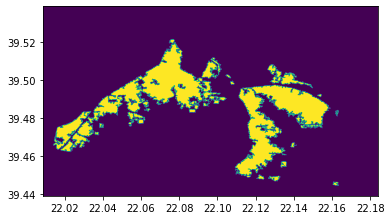

<AxesSubplot:>

In [20]:
import rasterio
from rasterio.plot import show
fp = '/home/olyg/Palamas/Results/Flood_map_Palamas.tif'
img = rasterio.open(fp)
show(img)

## <a id='search_download'></a>Free up disk space


In [21]:
! rm *.zip

## <a id='search_download'></a>Download Sentinel-2 using HDA API

In [22]:
Sentinel_2_download.Download_S2_data(
    AOI = app.geojson_S1,
    user = list(app.credentials.keys())[0],
    passwd = list(app.credentials.values())[0],
    Start_time = app.Start_time,
    End_time = app.End_time,
    write_dir = app.S2_dir,
    product = 'S2MSI2A',
    download = False,
    cloudcoverage = 100,
    to_file = True
)

proj_create: Open of /opt/conda/share/proj failed
proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode
Found 8 products


No download option is enabled. Printing the query results...
1ecab495-0e3a-47c4-b861-3d05934bb5e6    S2A_MSIL2A_20200920T092031_N0214_R093_T34SEJ_2...
fb796c95-e227-4fdd-8f44-e933337e97ad    S2B_MSIL2A_20200915T092029_N0214_R093_T34SEJ_2...
02fb0b84-dcc1-45ad-9587-8d11782fe957    S2A_MSIL2A_20200910T092031_N0214_R093_T34SEJ_2...
cdc77cc2-d783-41cd-9599-07aaaf476073    S2B_MSIL2A_20200905T092029_N0214_R093_T34SEJ_2...
Name: title, dtype: object


In [23]:
retrieve.S2_data(app.bbox, app.S2_dir)

S2A_MSIL2A_20200920T092031_N0214_R093_T34SEJ_20200920T115008.zip


Oops, downloaded 1186938554 byte(s), was supposed to be 1186897191 (extra 41363)
Download rate 40M/s


S2B_MSIL2A_20200915T092029_N0214_R093_T34SEJ_20200915T112537.zip


Oops, downloaded 1206404445 byte(s), was supposed to be 1206366126 (extra 38319)
Download rate 36.9M/s


S2A_MSIL2A_20200910T092031_N0214_R093_T34SEJ_20200910T122928.zip


Oops, downloaded 1217389362 byte(s), was supposed to be 1217350563 (extra 38799)
Download rate 38.7M/s


S2B_MSIL2A_20200905T092029_N0214_R093_T34SEJ_20200905T113748.zip


Oops, downloaded 1209409504 byte(s), was supposed to be 1209374417 (extra 35087)
Download rate 38.2M/s


0

In [24]:
app.run_crop_delineation('Crop_delineation')

---------------------------------------------------------------------------------------------
Searching for Sentinel 2 Satellite data...
Raw data found (*.SAFE file): S2B_MSIL2A_20200905T092029_N0214_R093_T34SEJ_20200905T113748.SAFE
  - Reading /home/olyg/Palamas/Sentinel_2_imagery/S2B_MSIL2A_20200905T092029_N0214_R093_T34SEJ_20200905T113748.SAFE/MTD_MSIL2A.xml
  - Done!
Raw data found (*.SAFE file): S2A_MSIL2A_20200910T092031_N0214_R093_T34SEJ_20200910T122928.SAFE
  - Reading /home/olyg/Palamas/Sentinel_2_imagery/S2A_MSIL2A_20200910T092031_N0214_R093_T34SEJ_20200910T122928.SAFE/MTD_MSIL2A.xml
  - Done!
Raw data found (*.SAFE file): S2B_MSIL2A_20200915T092029_N0214_R093_T34SEJ_20200915T112537.SAFE
  - Reading /home/olyg/Palamas/Sentinel_2_imagery/S2B_MSIL2A_20200915T092029_N0214_R093_T34SEJ_20200915T112537.SAFE/MTD_MSIL2A.xml
  - Done!
Raw data found (*.SAFE file): S2A_MSIL2A_20200920T092031_N0214_R093_T34SEJ_20200920T115008.SAFE
  - Reading /home/olyg/Palamas/Sentinel_2_imagery/S2A_MS

[0.077, 4.745, 4.846, 25.512]


Reading array...
Saving T34SEJ_20200905T092029_NDVI.tif...
Done!
Reading /home/olyg/Palamas/Sentinel_2_imagery/S2A_MSIL2A_20200910T092031_N0214_R093_T34SEJ_20200910T122928.SAFE/GRANULE/L2A_T34SEJ_A027260_20200910T092343/IMG_DATA/R10m/T34SEJ_20200910T092031_B08_10m.jp2
Reading /home/olyg/Palamas/Sentinel_2_imagery/S2A_MSIL2A_20200910T092031_N0214_R093_T34SEJ_20200910T122928.SAFE/GRANULE/L2A_T34SEJ_A027260_20200910T092343/IMG_DATA/R10m/T34SEJ_20200910T092031_B04_10m.jp2
Calculating NDVI for image S2A_MSIL2A_20200910T092031_N0214_R093_T34SEJ_20200910T122928.SAFE...
Reading array...
Reading array...
Saving T34SEJ_20200910T092031_NDVI.tif...
Done!
Reading /home/olyg/Palamas/Sentinel_2_imagery/S2B_MSIL2A_20200915T092029_N0214_R093_T34SEJ_20200915T112537.SAFE/GRANULE/L2A_T34SEJ_A018423_20200915T092052/IMG_DATA/R10m/T34SEJ_20200915T092029_B08_10m.jp2
Reading /home/olyg/Palamas/Sentinel_2_imagery/S2B_MSIL2A_20200915T092029_N0214_R093_T34SEJ_20200915T112537.SAFE/GRANULE/L2A_T34SEJ_A018423_202009

Reading /home/olyg/Palamas/Sentinel_2_imagery/S2B_MSIL2A_20200905T092029_N0214_R093_T34SEJ_20200905T113748.SAFE/GRANULE/L2A_T34SEJ_A018280_20200905T092031/IMG_DATA/R10m/T34SEJ_20200905T092029_NDVI_masked.tif
Reading /home/olyg/Palamas/Sentinel_2_imagery/S2A_MSIL2A_20200910T092031_N0214_R093_T34SEJ_20200910T122928.SAFE/GRANULE/L2A_T34SEJ_A027260_20200910T092343/IMG_DATA/R10m/T34SEJ_20200910T092031_NDVI_masked.tif
Reading /home/olyg/Palamas/Sentinel_2_imagery/S2B_MSIL2A_20200915T092029_N0214_R093_T34SEJ_20200915T112537.SAFE/GRANULE/L2A_T34SEJ_A018423_20200915T092052/IMG_DATA/R10m/T34SEJ_20200915T092029_NDVI_masked.tif
Reading /home/olyg/Palamas/Sentinel_2_imagery/S2A_MSIL2A_20200920T092031_N0214_R093_T34SEJ_20200920T115008.SAFE/GRANULE/L2A_T34SEJ_A027403_20200920T092033/IMG_DATA/R10m/T34SEJ_20200920T092031_NDVI_masked.tif


Resample monthly max...


2022-08-31 19:45:42.711688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-31 19:45:42.727140: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-31 19:45:42.727223: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-olyg): /proc/driver/nvidia/version does not exist
2022-08-31 19:45:42.746344: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
  0%|          | 0/4 [00:00<?, ?it/s]

Running pretrained model...


2022-08-31 19:45:44.112281: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
100%|██████████| 4/4 [00:35<00:00,  8.96s/it]
proj_create: Open of /opt/conda/share/proj failed
proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


Saving result...
Running delineation...
Running flooded fields estimation procedure...


proj_create: Open of /opt/conda/share/proj failed
proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


0